In [1]:
#coding=utf-8

import numpy as np
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import math
from sklearn.metrics import roc_auc_score
import joblib
import scorecard as sc

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set(context='notebook',font='simhei',style='whitegrid')
# 设置风格尺度和显示中文

from sklearn.linear_model import LogisticRegression

'''单变量特征选取'''
from sklearn.feature_selection import SelectKBest, chi2
'''去除方差小的特征'''
from sklearn.feature_selection import VarianceThreshold
'''循环特征选取'''
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
'''RFE_CV'''
from sklearn.ensemble import ExtraTreesClassifier

ModuleNotFoundError: No module named 'lightgbm'

In [2]:
path = 'C:/Users/home/myself/A1/'
train_application = pd.read_csv('train/train_Application.csv')
train_history_application = pd.read_csv('train/train_History_Application.csv')    # (647963, 32)
train_history_payment = pd.read_csv('train/train_History_Payment.csv')
train_personas = pd.read_csv('train/train_Personas.csv')
train_label = pd.read_csv('train/train_label.csv')

A_application = pd.read_csv('A/A_Application.csv')
A_history_application = pd.read_csv('A/A_History_Application.csv')    # (97021, 32)
A_history_payment = pd.read_csv('A/A_History_Payment.csv')
A_personas = pd.read_csv('A/A_Personas.csv')


train_application_label = pd.merge(train_application,train_label)    # (140000, 31)
# print('贷款申请信息：',train_Application_label.shape)
train_base = pd.merge(train_application_label,train_personas)
# print('客户贷款基础信息：',train_base.shape)   # (140000, 63)
train_base.head()

A_application['标签'] = -1
A_base = pd.merge(A_application,A_personas)
# print(A_base.shape)   # (21511, 63)

all_train_base = pd.concat([train_base,A_base],axis=0)
all_train_base = all_train_base.reset_index(drop = True)
print('all_train_base:',all_train_base.shape)

all_history_application = pd.concat([train_history_application,A_history_application],axis=0)
all_history_application = all_history_application.reset_index(drop = True)
print('all_history_application',all_history_application.shape)

all_history_payment = pd.concat([train_history_payment,A_history_payment],axis=0)
all_history_payment = all_history_payment.reset_index(drop = True)
print('all_history_payment',all_history_payment.shape)


FileNotFoundError: [Errno 2] File b'train/train_Application.csv' does not exist: b'train/train_Application.csv'

In [3]:
label = all_train_base[['申请编号','标签']]
all_history_application_label = pd.merge(all_history_application,label,how='left',on='申请编号')

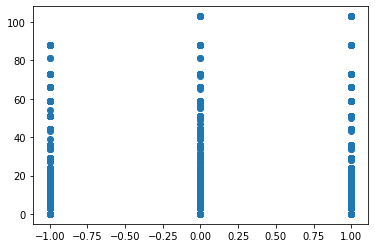

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(all_history_application_label['标签'],all_history_application_label['贷款期数'])

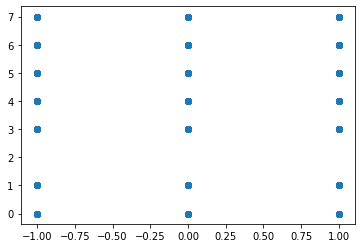

In [9]:
plt.scatter(all_history_application_label['标签'],all_history_application_label['申请周内日'])

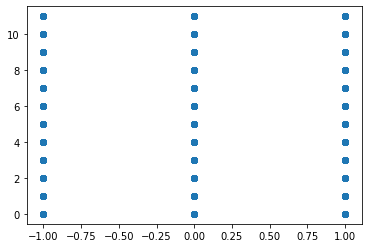

In [10]:
plt.scatter(all_history_application_label['标签'],all_history_application_label['申请时点'])